In [319]:
import cv2 
from IPython.display import display, Image
import numpy as np
import math 
from PIL import Image as pimg

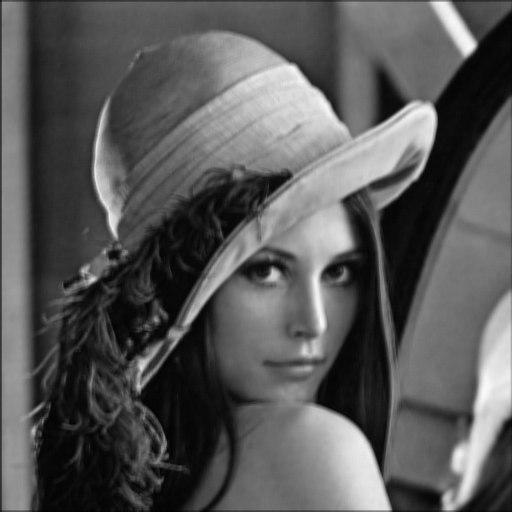

In [320]:
image_path = "lena.png"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(Image(filename='lena.png'))

In [321]:
matrix = np.array(img)
height, width = matrix.shape 
print(height)
print(width)
print(matrix)

512
512
[[ 26  39  81 ...  52  52  45]
 [ 33  48 102 ...  66  66  57]
 [ 54  75 139 ...  89  84  71]
 ...
 [ 44  60 112 ...  24  22  18]
 [ 33  46  83 ...  18  16  13]
 [ 28  38  66 ...  14  12  10]]


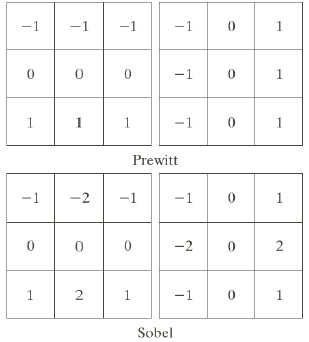

In [322]:
display(Image(filename='formula.png'))

In [323]:
new_row = np.zeros(512, dtype=int)
new_matrix = np.insert(matrix, 0, new_row, axis=0)
new_matrix = np.insert(new_matrix, 513, new_row, axis=0)
new_column = np.zeros((new_matrix.shape[0], 1), dtype=int)
new_matrix = np.insert(new_matrix, [0, new_matrix.shape[1]], new_column, axis=1)
height, width = new_matrix.shape 
print(height)
print(width)
print(new_matrix)

514
514
[[ 0  0  0 ...  0  0  0]
 [ 0 26 39 ... 52 45  0]
 [ 0 33 48 ... 66 57  0]
 ...
 [ 0 33 46 ... 16 13  0]
 [ 0 28 38 ... 12 10  0]
 [ 0  0  0 ...  0  0  0]]


In [324]:
matrix2 = np.zeros_like(new_matrix, dtype=np.float32)
matrix6 = np.zeros_like(new_matrix, dtype=np.float32)
prewitt_filtered_matrix = np.zeros_like(new_matrix)
for y in range(1, height - 1):
    for x in range(1, width - 1):
        matrix2[y,x] = new_matrix[y-1,x-1]*(-1) + new_matrix[y,x-1]*(-1) + new_matrix[y+1,x-1]*(-1) + new_matrix[y-1,x+1] + new_matrix[y,x+1] + new_matrix[y+1,x+1]
        matrix6[y,x] = new_matrix[y-1,x-1]*(-1) + new_matrix[y-1,x]*(-1) + new_matrix[y-1,x+1]*(-1) + new_matrix[y+1,x-1] + new_matrix[y+1,x] + new_matrix[y+1,x+1]
prewitt_filtered_matrix = np.sqrt(np.square(matrix2) + np.square(matrix6))
prewitt_filtered_matrix = prewitt_filtered_matrix.astype(np.uint8)
print(prewitt_filtered_matrix)

[[  0   0   0 ...   0   0   0]
 [  0 118 221 ... 189 170   0]
 [  0 174 242 ... 100 210   0]
 ...
 [  0 148 177 ...  31  53   0]
 [  0 115 184 ...  47  40   0]
 [  0   0   0 ...   0   0   0]]


In [325]:
matrix3 = np.zeros_like(new_matrix, dtype=np.float32)
matrix7 = np.zeros_like(new_matrix, dtype=np.float32)
sobel_filtered_matrix = np.zeros_like(new_matrix)
for y in range(1, height - 1):
    for x in range(1, width - 1):
        matrix3[y,x] = new_matrix[y-1,x-1]*(-1) + new_matrix[y,x-1]*(-2) + new_matrix[y+1,x-1]*(-1) + new_matrix[y-1,x+1] + (new_matrix[y,x+1]*2) + new_matrix[y+1,x+1]
        matrix7[y,x] = new_matrix[y-1,x-1]*(-1) + new_matrix[y-1,x]*(-2) + new_matrix[y-1,x+1]*(-1) + new_matrix[y+1,x-1] + (new_matrix[y+1,x]*2) + new_matrix[y+1,x+1]
sobel_filtered_matrix = np.sqrt(np.square(matrix3) + np.square(matrix7))
sobel_filtered_matrix = sobel_filtered_matrix.astype(np.uint8)
print(sobel_filtered_matrix)

[[  0   0   0 ...   0   0   0]
 [  0 169  36 ...   0 247   0]
 [  0 229  63 ... 134  24   0]
 ...
 [  0 197 231 ...  42  70   0]
 [  0 165 243 ...  64  58   0]
 [  0   0   0 ...   0   0   0]]


In [326]:
row_indices_to_remove = [0, 513]
column_indices_to_remove = [0, prewitt_filtered_matrix.shape[1] - 1]
prewitt_filtered_matrix = np.delete(prewitt_filtered_matrix, row_indices_to_remove, axis=0)
prewitt_filtered_matrix = np.delete(prewitt_filtered_matrix, column_indices_to_remove, axis=1)
height, width = prewitt_filtered_matrix.shape 
print(height)
print(width)
print(prewitt_filtered_matrix)

512
512
[[118 221  14 ... 198 189 170]
 [174 242 220 ... 106 100 210]
 [203 253 208 ...  63  71 236]
 ...
 [169 195 169 ...  19  24  62]
 [148 177 171 ...  30  31  53]
 [115 184 226 ...  51  47  40]]


In [327]:
sobel_filtered_matrix = np.delete(sobel_filtered_matrix, row_indices_to_remove, axis=0)
sobel_filtered_matrix = np.delete(sobel_filtered_matrix, column_indices_to_remove, axis=1)
height, width = sobel_filtered_matrix.shape 
print(height)
print(width)
print(sobel_filtered_matrix)

512
512
[[169  36 124 ...   8   0 247]
 [229  63  43 ... 143 134  24]
 [ 25  86  26 ...  87  96  65]
 ...
 [229   8 233 ...  25  34  85]
 [197 231 231 ...  40  42  70]
 [165 243  58 ...  69  64  58]]


In [328]:
print(np.min(prewitt_filtered_matrix))
print(np.max(prewitt_filtered_matrix))
print(np.min(sobel_filtered_matrix))
print(np.max(sobel_filtered_matrix))

0
255
0
255


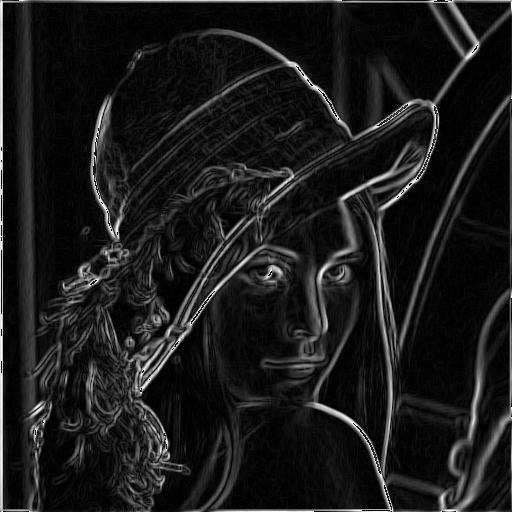

In [329]:
cv2.imwrite('prewitt_lena.png', prewitt_filtered_matrix.astype(np.uint8))
display(Image(filename='prewitt_lena.png'))

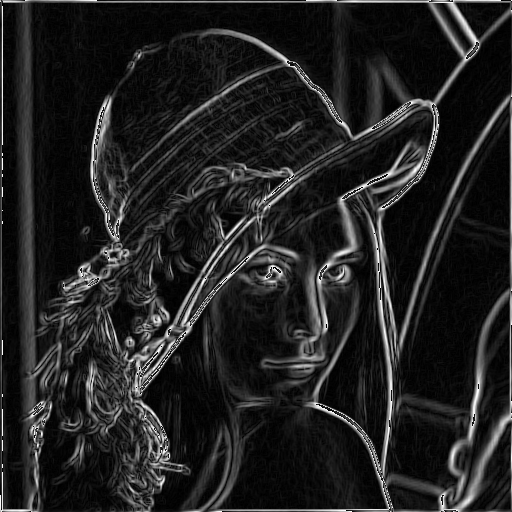

In [330]:
cv2.imwrite('sobel_lena.png', sobel_filtered_matrix.astype(np.uint8))
display(Image(filename='sobel_lena.png'))

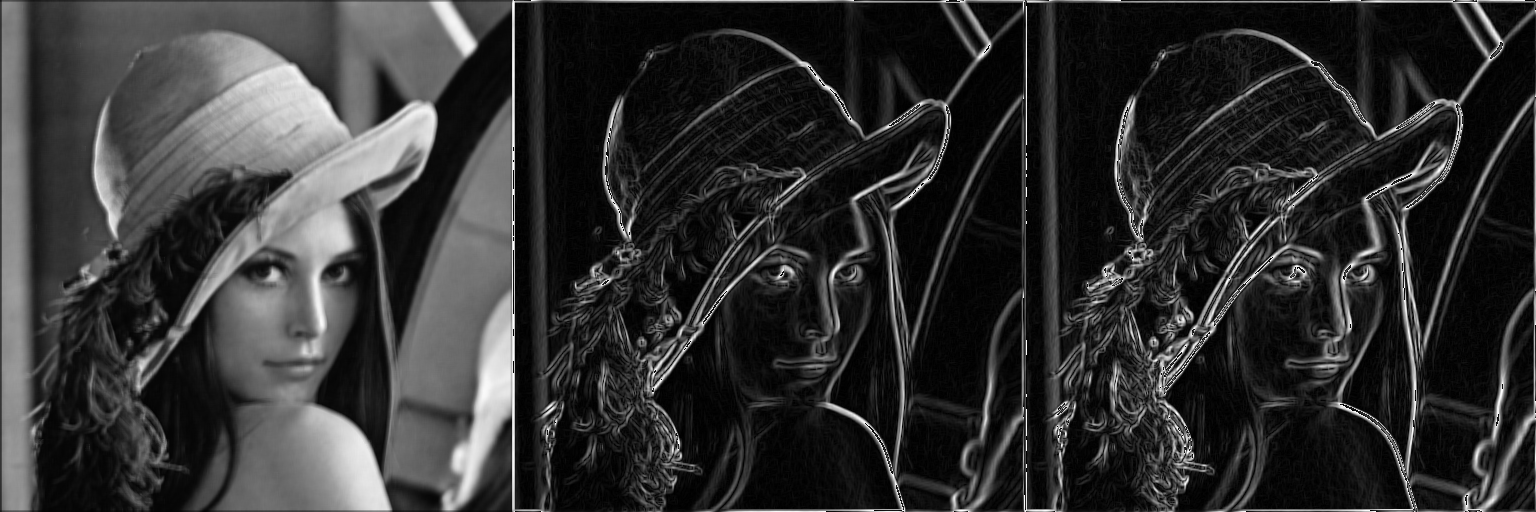

In [331]:
image1 = pimg.open('lena.png')
image2 = pimg.open('prewitt_lena.png')
image3 = pimg.open('sobel_lena.png')
combined_image = pimg.new('RGB', (image1.width + image2.width + image3.width, image1.height))
combined_image.paste(image1, (0, 0))
combined_image.paste(image2, (image1.width, 0))
combined_image.paste(image3, (image1.width + image2.width , 0))
display(combined_image)